In [ ]:
#QUESTION (1) -TASK-1 : Create a bar chart or histogram to visualize the distribution of a categorical or 
#continuous variable, such as the distribution of ages or genders in a population.

#I have taken TITANIC DATASET FOR THE IMPLEMENTATION

# NAME-PRAGYA SAINI

In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense,LSTM
from tensorflow.keras.optimizers import Adam
import numpy as np

In [2]:
df = pd.read_csv(r"C:\Users\lenovo\Desktop\titanic\train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe

<bound method NDFrame.describe of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                 

In [7]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [8]:
df.skew()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_10404\1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.389108
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

In [9]:
survived_passengers = df[df['Survived'] == 1]

female_passengers = df[df['Sex'] == 'female']

In [10]:
average_age_by_class = df.groupby('Pclass')['Age'].mean()
print(average_age_by_class)

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64


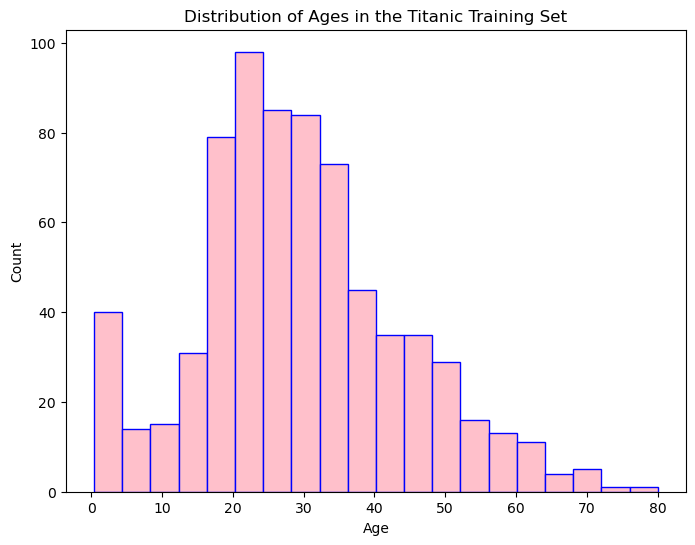

In [11]:
import pandas as pd
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
plt.hist(df['Age'].dropna(), bins=20, color='pink', edgecolor='blue')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Ages in the Titanic Training Set')
plt.show()




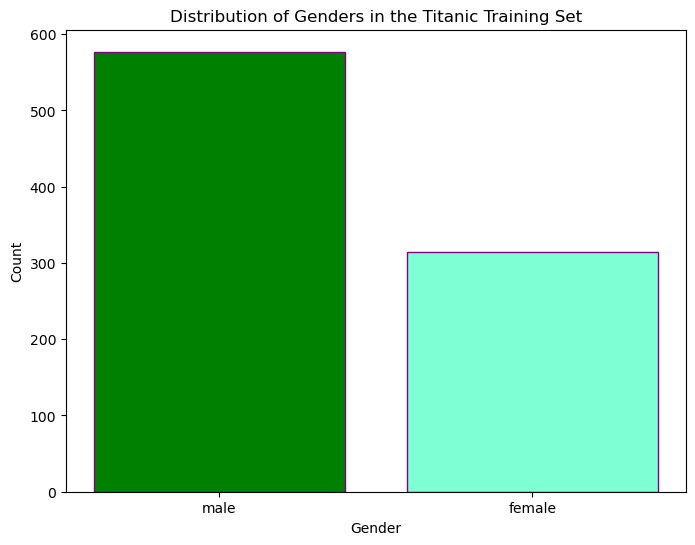

In [12]:
gender_counts = df['Sex'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(gender_counts.index, gender_counts, color=['green', 'aquamarine'], edgecolor='purple') 
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Genders in the Titanic Training Set')
plt.show()


In [13]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1


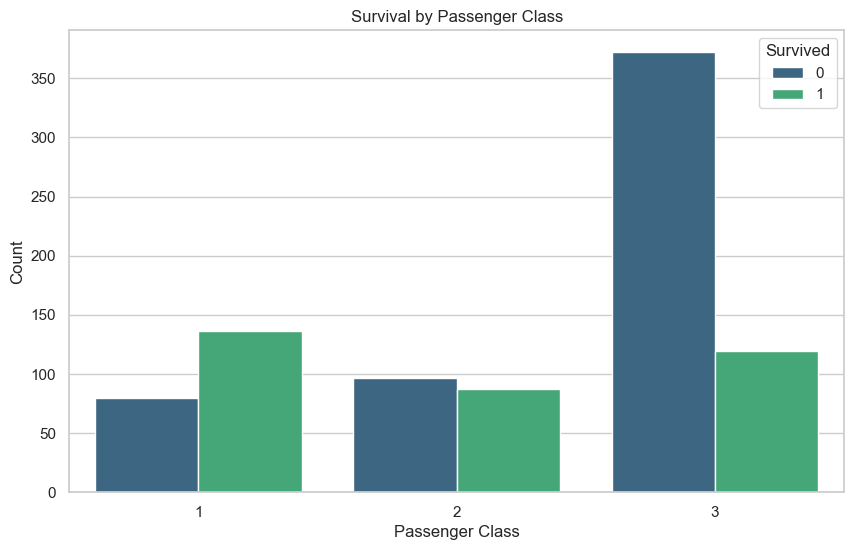

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', hue='Survived', data=df, palette='viridis')
plt.title('Survival by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()


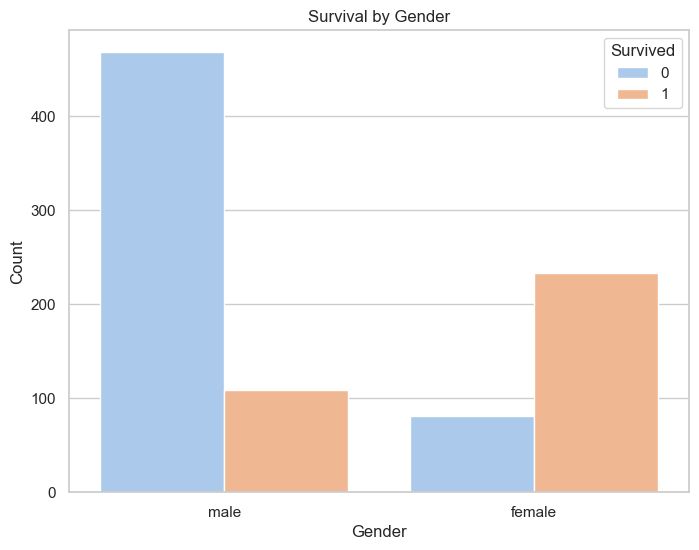

In [15]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='Survived', data=df, palette='pastel')
plt.title('Survival by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

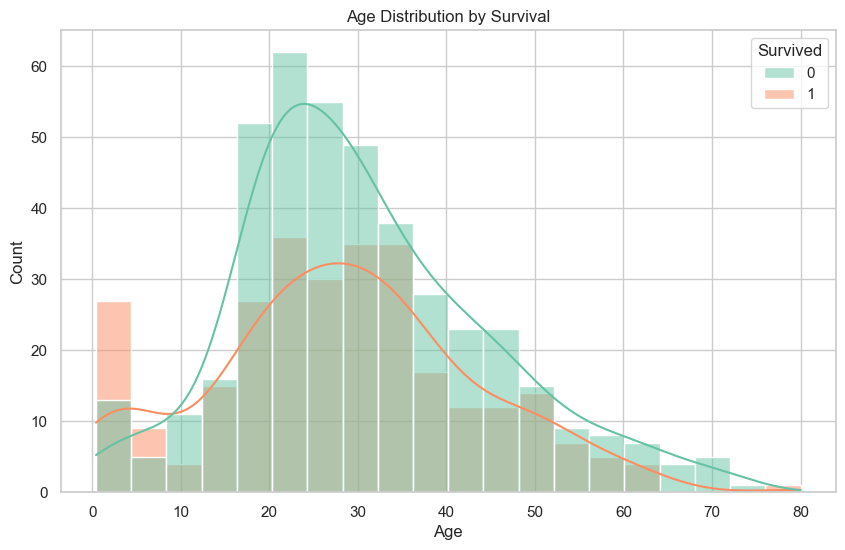

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(x='Age', hue='Survived', data=df, bins=20, kde=True, palette='Set2')
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


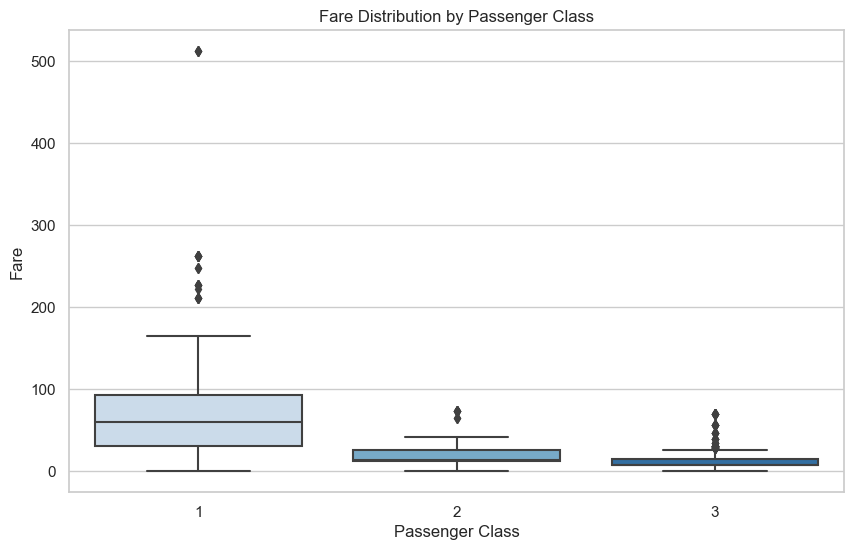

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', data=df, palette='Blues')
plt.title('Fare Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()


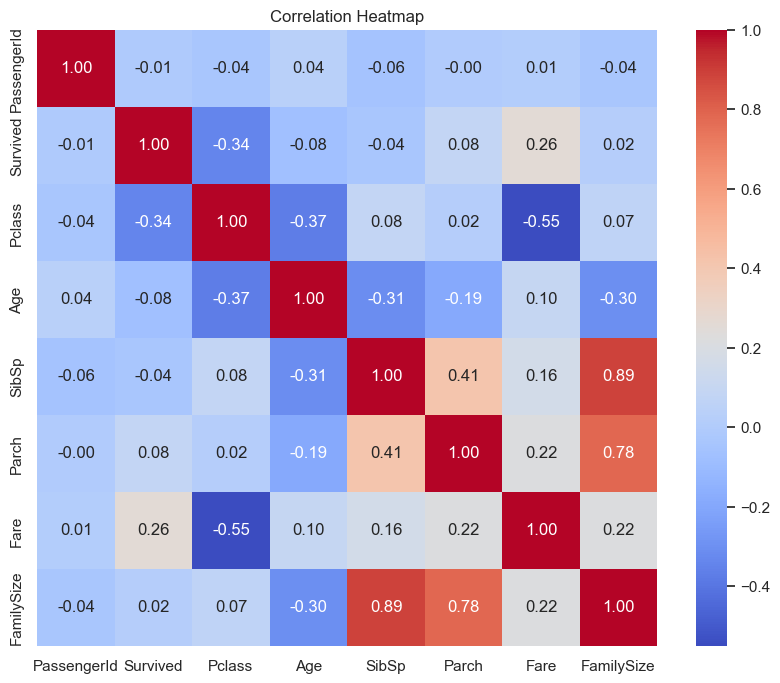

In [18]:
import seaborn as sns
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148']


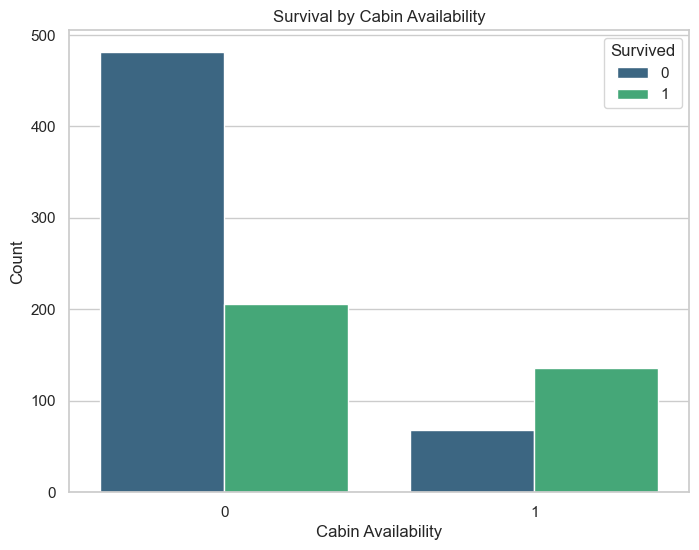

In [19]:
print(df['Cabin'].unique())
df['HasCabin'] = df['Cabin'].notnull().astype(int)
plt.figure(figsize=(8, 6))
sns.countplot(x='HasCabin', hue='Survived', data=df, palette='viridis')
plt.title('Survival by Cabin Availability')
plt.xlabel('Cabin Availability')
plt.ylabel('Count')
plt.show()


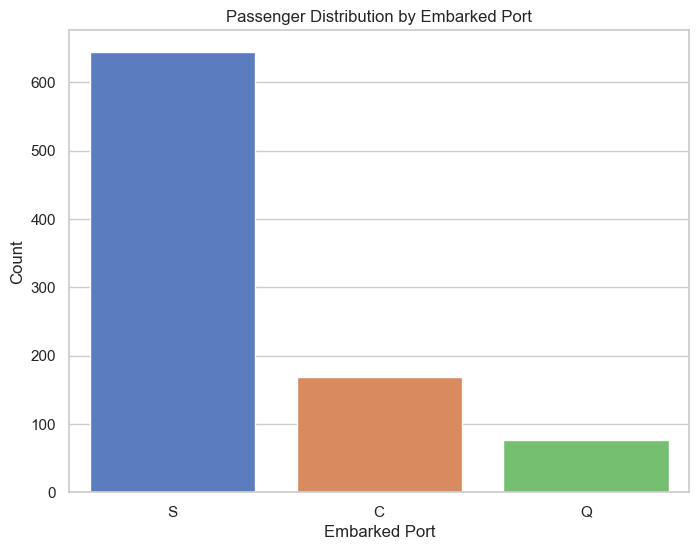

In [20]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Embarked', data=df, palette='muted')
plt.title('Passenger Distribution by Embarked Port')
plt.xlabel('Embarked Port')
plt.ylabel('Count')
plt.show()



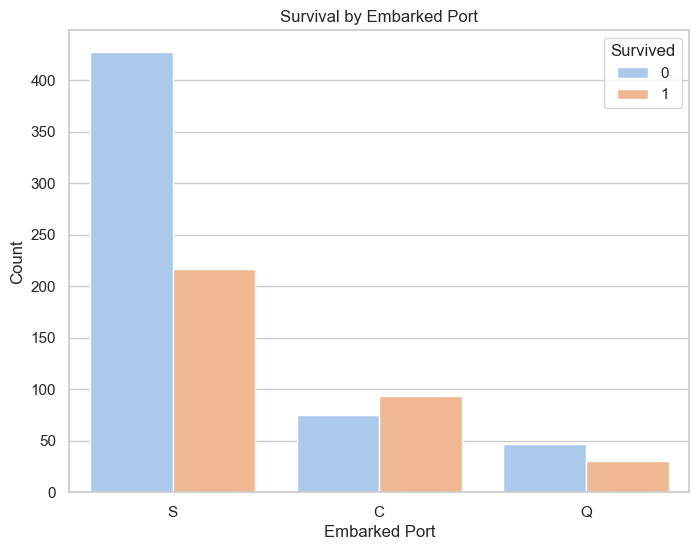

In [21]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Embarked', hue='Survived', data=df, palette='pastel')
plt.title('Survival by Embarked Port')
plt.xlabel('Embarked Port')
plt.ylabel('Count')
plt.show()


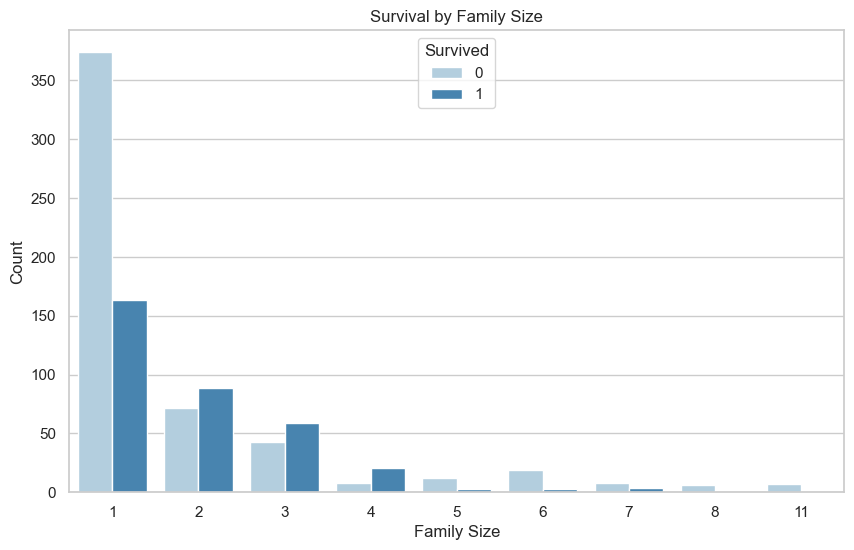

In [22]:

df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
plt.figure(figsize=(10, 6))
sns.countplot(x='FamilySize', hue='Survived', data=df, palette='Blues')
plt.title('Survival by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.show()


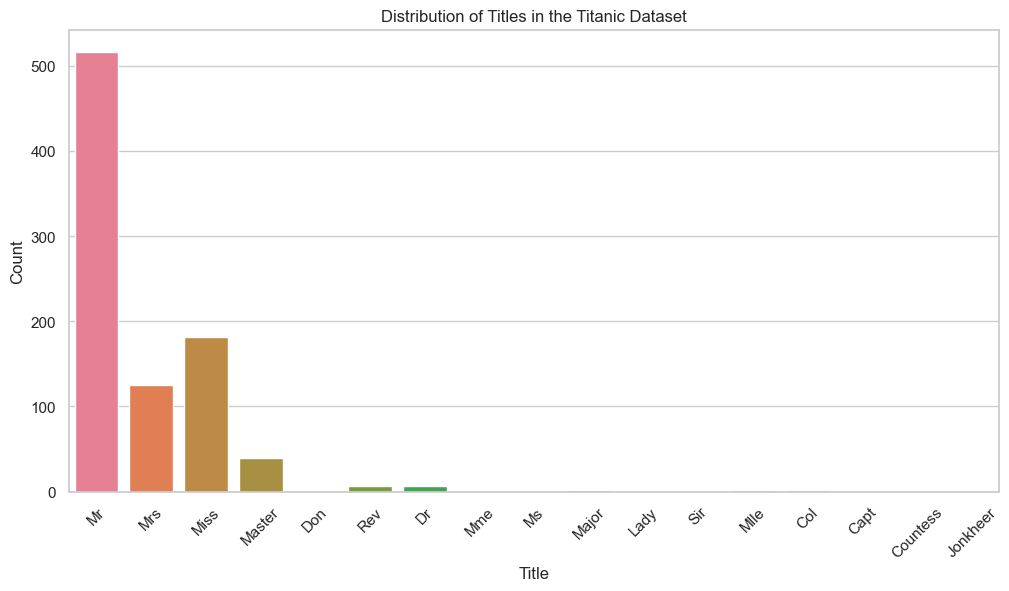

In [23]:

df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

plt.figure(figsize=(12, 6))
sns.countplot(x='Title', data=df, palette='husl')
plt.title('Distribution of Titles in the Titanic Dataset')
plt.xlabel('Title')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



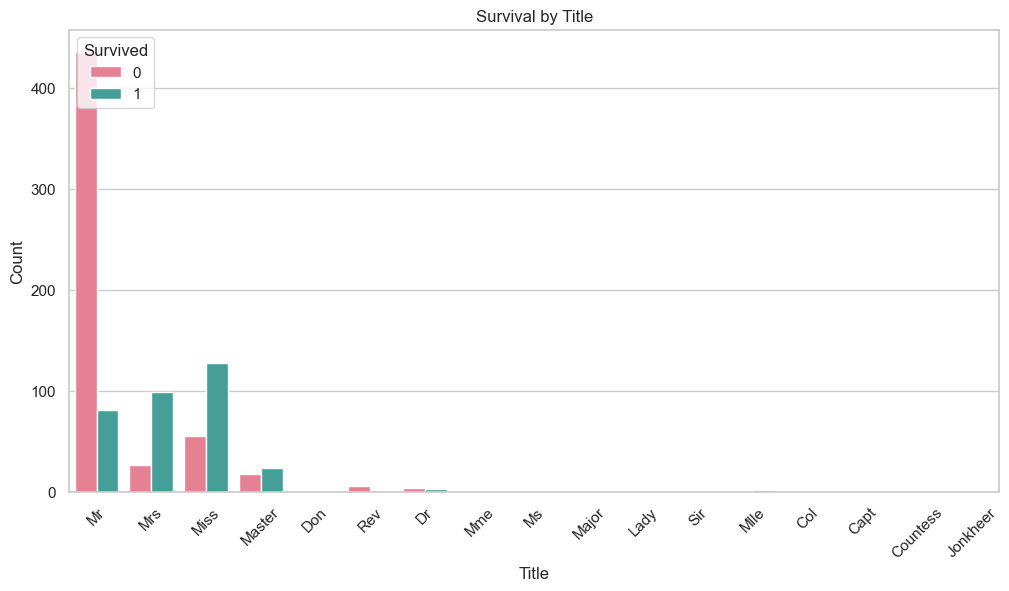

In [24]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Title', hue='Survived', data=df, palette='husl')
plt.title('Survival by Title')
plt.xlabel('Title')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


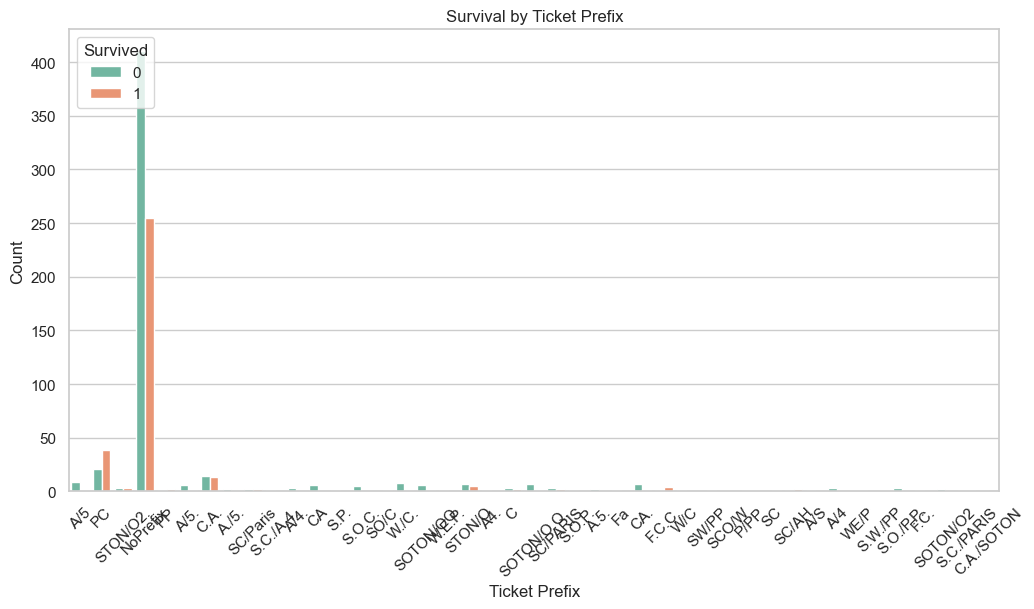

In [25]:

df['TicketPrefix'] = df['Ticket'].apply(lambda x: x.split()[0] if len(x.split()) > 1 else 'NoPrefix')

plt.figure(figsize=(12, 6))
sns.countplot(x='TicketPrefix', hue='Survived', data=df, palette='Set2')
plt.title('Survival by Ticket Prefix')
plt.xlabel('Ticket Prefix')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


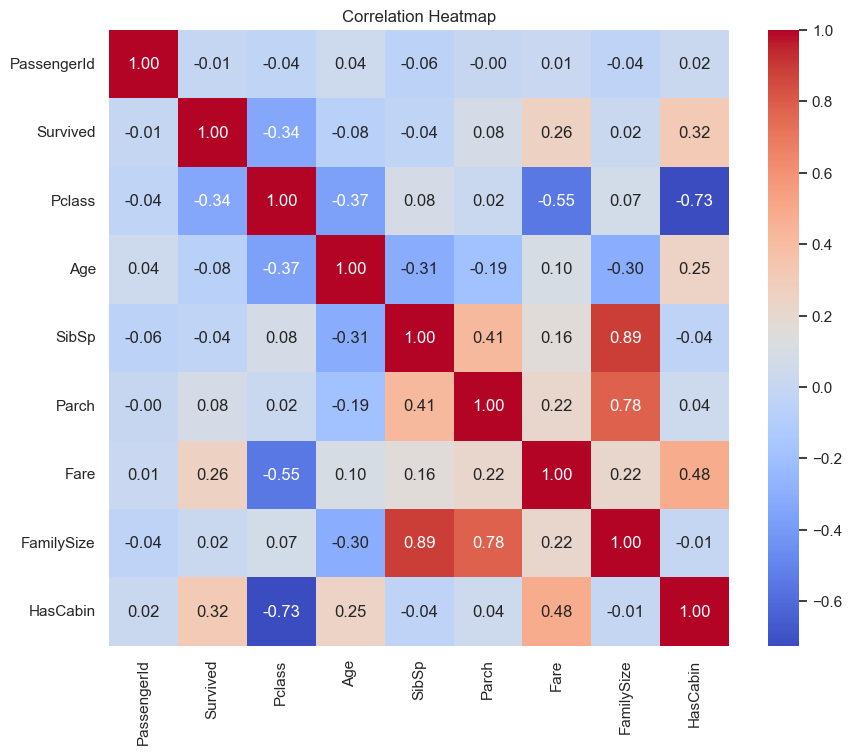

In [26]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
#So to conclude -the generated bar charts successfully visualizes the distribution of ages in the given population. The x-axis represents age ranges, and the y-axis indicates the frequency or count of individuals within each age range. The histogram provides a clear overview of the age distribution, highlighting any potential patterns or concentrations within the population.
#Interpreting the chart, one can easily identify the most common age ranges and observe any notable variations or outliers. This visualization serves as a valuable tool for understanding the demographic composition of the population under consideration.